# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [8]:
# your code here
!pip install faker

In [7]:
!pip install --upgrade pip

     |████████████████████████████████| 2.1 MB 36.3 MB/s            
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1


In [226]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from faker import Faker
import random

%matplotlib inline

## Step 2: Generate random data for the social media data and Data Cleaning

In [103]:
# Generate random data for the social media data
# platfrom X(twitter: old name)

# Initialize Faker to generate fake data
fake = Faker()

# Number of tweets to generate
n_tweets = 1000

# Predefined categories for posts
categories = ['Fitness', 'Tech', 'Family', 'Beauty', 'Travel', 'Food']

# Generate random Twitter-like data
data = {
    'tweet_id': [fake.unique.random_int(min=1, max=1000000) for _ in range(n_tweets)],  # Random tweet IDs
    'user_id': [fake.unique.random_int(min=1, max=10000) for _ in range(n_tweets)],  # Random user IDs
    'tweet_content': [fake.text(max_nb_chars=280) for _ in range(n_tweets)],  # Random tweet content (max 280 chars)
    'tweet_timestamp': [fake.date_time_this_year() for _ in range(n_tweets)],  # Random tweet timestamp in this year
    'category': [random.choice(categories) for _ in range(n_tweets)], # Randon category for each tweet 
    'retweets': [random.randint(0, 10000) for _ in range(n_tweets)],  # Random number of retweets
    'likes': [random.randint(0, 5000) for _ in range(n_tweets)],  # Random number of likes
    'replies': [random.randint(0, 500) for _ in range(n_tweets)],  # Random number of replies
    'followers_count': [random.randint(10, 1000000) for _ in range(n_tweets)],  # Random follower count for users
}

In [104]:
# Create a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the generated data
df.head(5)

,tweet_id,user_id,tweet_content,tweet_timestamp,category,retweets,likes,replies,followers_count
0,22839,9547,Fund new like your up section challenge. Insti...,2024-05-07 11:07:11,Travel,8173,1861,225,195757
1,963828,2647,Mind model ahead let treat low believe. Clearl...,2024-01-27 02:37:39,Family,5730,4984,202,590735
2,763559,7976,Management if much capital father. Different p...,2024-07-12 21:15:51,Fitness,6123,1143,46,204382
3,405806,2271,Story can lead there music upon. Fine manager ...,2024-01-04 05:39:24,Travel,2316,258,23,836250
4,722150,7029,See stock how into fill determine today. Body ...,2024-07-14 15:47:16,Tech,8447,971,341,982576


In [105]:
df.duplicated().sum()

0

In [106]:
# df = df.drop_duplicates()

In [107]:
df.isnull().sum()

tweet_id           0
user_id            0
tweet_content      0
tweet_timestamp    0
category           0
retweets           0
likes              0
replies            0
followers_count    0
dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tweet_id         1000 non-null   int64         
 1   user_id          1000 non-null   int64         
 2   tweet_content    1000 non-null   object        
 3   tweet_timestamp  1000 non-null   datetime64[ns]
 4   category         1000 non-null   object        
 5   retweets         1000 non-null   int64         
 6   likes            1000 non-null   int64         
 7   replies          1000 non-null   int64         
 8   followers_count  1000 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 70.4+ KB


In [109]:
df.describe()

,tweet_id,user_id,retweets,likes,replies,followers_count
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,497753.783000,4853.001000,4885.577000,2508.56600,252.997000,524080.551000
std,292989.978982,2896.710856,2871.455519,1399.78541,143.083682,287948.489168
min,1771.000000,4.000000,27.000000,2.00000,1.000000,136.000000
25%,239250.750000,2386.250000,2416.750000,1326.25000,129.750000,276812.750000
50%,512384.000000,4663.500000,4986.500000,2472.00000,258.000000,535950.500000
75%,744786.000000,7437.500000,7248.500000,3685.75000,377.000000,772080.000000
max,999838.000000,9999.000000,9987.000000,4988.00000,500.000000,999596.000000


In [168]:
df['category'].value_counts()

Family     187
Beauty     175
Fitness    172
Food       159
Tech       154
Travel     153
Name: category, dtype: int64

## Step 3: Data Analysis and Data Visualization 

In [146]:
df_category_analysis = df.groupby('category').agg(
    retweets=('retweets', 'sum'),
    likes=('likes', 'sum'),
    replies=('replies', 'sum'),
    followers_count=('followers_count', 'mean')  # Specify aggregation function for follower_counts
).reset_index()
df_category_analysis

,category,retweets,likes,replies,followers_count
0,Beauty,921820,464651,46168,499204.262857
1,Family,885535,443429,46811,534226.219251
2,Fitness,809581,409418,43883,490889.889535
3,Food,832368,418598,37158,550008.968553
4,Tech,774804,394905,41266,546129.792208
5,Travel,661469,377565,37711,528307.366013


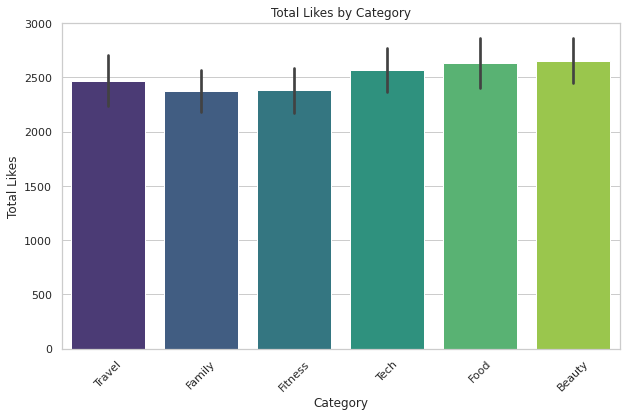

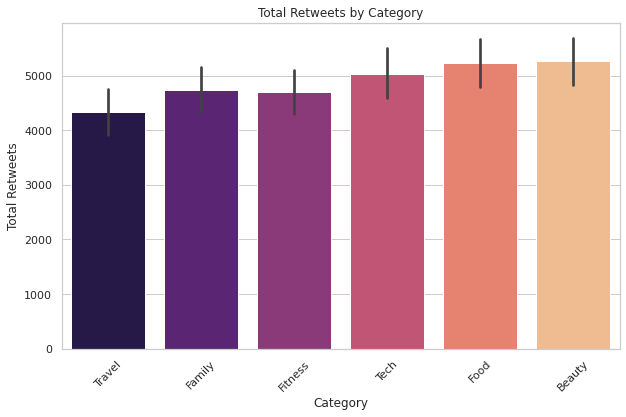

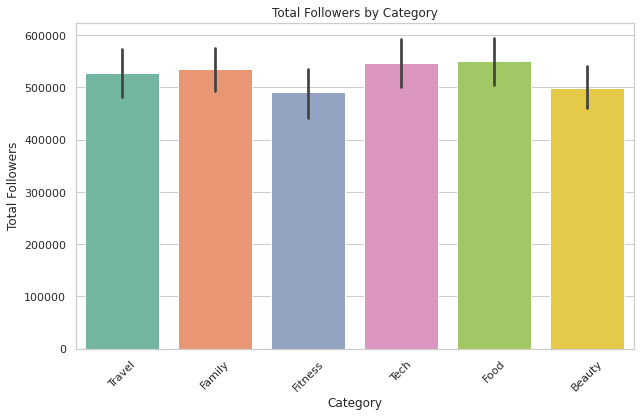

In [111]:
# Set style for the plots
sns.set(style='whitegrid')

x1 = df['category']
y1 = df['likes'] 
y2 = df['retweets']
y3 = df['followers_count']

# Bar plot for likes by category
plt.figure(figsize=(10, 6))
sns.barplot(x=x1, y=y1, data = df_category_analysis, palette='viridis')
plt.title('Total Likes by Category')
plt.xlabel('Category')
plt.ylabel('Total Likes')
plt.xticks(rotation=45)
plt.show()

# Bar plot for retweets by category
plt.figure(figsize=(10, 6))
sns.barplot(x=x1, y=y2, data = df_category_analysis, palette='magma')
plt.title('Total Retweets by Category')
plt.xlabel('Category')
plt.ylabel('Total Retweets')
plt.xticks(rotation=45)
plt.show()

# Bar plot for followers by category
plt.figure(figsize=(10, 6))
sns.barplot(x=x1, y=y3, data = df_category_analysis, palette='Set2')
plt.title('Total Followers by Category')
plt.xlabel('Category')
plt.ylabel('Total Followers')
plt.xticks(rotation=45)
plt.show()

### Categories Engagement

In [170]:
# category_seg = []
# for category, group in category_segments:
#    category_seg.append({
#        "Category": category,
#        "Number of Tweets": len(group) 
#    })
# df_category_seg = pd.DataFrame(category_seg)
# df_category_seg

In [171]:
category_segments = df.groupby('category')

### Number of likes tweet engagements in each category
- low engagement: 0 - 99 retweets
- medium engagement: 100 - 999 retweets
- high engagement: 1000+ retweets

In [209]:
engagement_summary_likes = {}

for category, group in category_segments:
    low_engagement = group[group['likes'] < 100]
    medium_engagement = group[(group['likes'] >= 100) & (group['likes'] < 1000)]
    high_engagement = group[group['likes'] >= 1000]

    # results in the dictionary
    engagement_summary_likes[category] = {
        'Low Engagement Tweets': len(low_engagement),
        'Medium Engagement Tweets': len(medium_engagement),
        'High Engagement Tweets': len(high_engagement),
    }

df_engagement_summary_likes = pd.DataFrame(engagement_summary_likes).T

# Display the engagement summary
df_engagement_summary_likes

,Low Engagement Tweets,Medium Engagement Tweets,High Engagement Tweets
Beauty,1,27,147
Family,4,36,147
Fitness,5,24,143
Food,4,22,133
Tech,3,18,133
Travel,2,27,124


### Number of likes per tweet
- low: least in category
- medium: medium in category
- high: most in category

In [219]:
# Define engagement levels based on likes
df['engagement_level_likes'] = pd.cut(df['likes'], bins=[0, 99, 999, float('inf')], labels=['Low', 'Medium', 'High'])

# Group by engagement level
engagement_segment_likes = df.groupby(['category', 'engagement_level_likes']).agg(
    total_likes=('likes', 'sum')
).reset_index()
engagement_segment_likes

,category,engagement_level_likes,total_likes
0,Beauty,Low,29
1,Beauty,Medium,14114
2,Beauty,High,450508
3,Family,Low,222
4,Family,Medium,21571
5,Family,High,421636
6,Fitness,Low,317
7,Fitness,Medium,15078
8,Fitness,High,394023
9,Food,Low,313


### Number of  retweets tweet engagements in each category
- low engagement: 0 - 99 retweets
- medium engagement: 100 - 999 retweets
- high engagement: 1000+ retweets

In [210]:
engagement_summary_retweets = {}

for category, group in category_segments:
    low_engagement = group[group['retweets'] < 100]
    medium_engagement = group[(group['retweets'] >= 100) & (group['retweets'] < 1000)]
    high_engagement = group[group['retweets'] >= 1000]

    # results in the dictionary
    engagement_summary_retweets[category] = {
        'Low Engagement Tweets': len(low_engagement),
        'Medium Engagement Tweets': len(medium_engagement),
        'High Engagement Tweets': len(high_engagement),
    }

df_engagement_summary__retweets = pd.DataFrame(engagement_summary_retweets).T

# Display the engagement summary
df_engagement_summary__retweets

,Low Engagement Tweets,Medium Engagement Tweets,High Engagement Tweets
Beauty,1,19,155
Family,0,21,166
Fitness,0,19,153
Food,1,19,139
Tech,1,19,134
Travel,2,18,133


### Number of retweets per tweet
- low: least in category
- medium: medium in category
- high: most in category

In [220]:
# Define engagement levels based on retweets
df['engagement_level_retweets'] = pd.cut(df['retweets'], bins=[0, 99, 999, float('inf')], labels=['Low', 'Medium', 'High'])

# Group by engagement level
engagement_segment_retweets = df.groupby(['category', 'engagement_level_retweets']).agg(
    total_retweets=('retweets', 'sum')
).reset_index()
engagement_segment_retweets

,category,engagement_level_retweets,total_retweets
0,Beauty,Low,27.0
1,Beauty,Medium,10134.0
2,Beauty,High,911659.0
3,Family,Low,NaN
4,Family,Medium,11192.0
5,Family,High,874343.0
6,Fitness,Low,NaN
7,Fitness,Medium,11234.0
8,Fitness,High,798347.0
9,Food,Low,79.0


### Daily Tweets

In [221]:
# Convert the timestamp to a datetime 
df['tweet_timestamp'] = pd.to_datetime(df['tweet_timestamp'])

# Create a new column for the date
df['date'] = df['tweet_timestamp'].dt.date

# Group by date
daily_tweet = df.groupby('date').size().reset_index(name='number_of_tweets')

# Display the daily post counts
daily_tweet


,date,number_of_tweets
0,2024-01-01,5
1,2024-01-02,5
2,2024-01-03,6
3,2024-01-04,5
4,2024-01-05,5
...,...,...
269,2024-10-04,1
270,2024-10-05,6
271,2024-10-06,4
272,2024-10-07,3


### Top 1 Retweets Monthly Engagement Categories

In [271]:
# Extract month and year from the date
df['date'] = df['date'].astype('datetime64[ns]')
df['month'] = df['date'].dt.month

# Group by 'category' and 'month_year', then sum the retweets
monthly_engagement = df.groupby(['category', 'month']).agg(
    top_engage_retweets=('retweets', 'sum')
)

top_monthly_engagement = monthly_engagement.loc[monthly_engagement.groupby('category')['top_engage_retweets'].idxmax()]
top_monthly_engagement.reset_index()


,category,month,top_engage_retweets
0,Beauty,7,140303
1,Family,3,156658
2,Fitness,9,118055
3,Food,2,107290
4,Tech,6,117708
5,Travel,8,112446


### Retweets Monthly Engagement

In [273]:
df_month_engage_retweets = monthly_engagement.reset_index()
df_month_engage_retweets

,category,month,top_engage_retweets
0,Beauty,1,93863
1,Beauty,2,129203
2,Beauty,3,86690
3,Beauty,4,75787
4,Beauty,5,85151
5,Beauty,6,123045
6,Beauty,7,140303
7,Beauty,8,109571
8,Beauty,9,51844
9,Beauty,10,26363


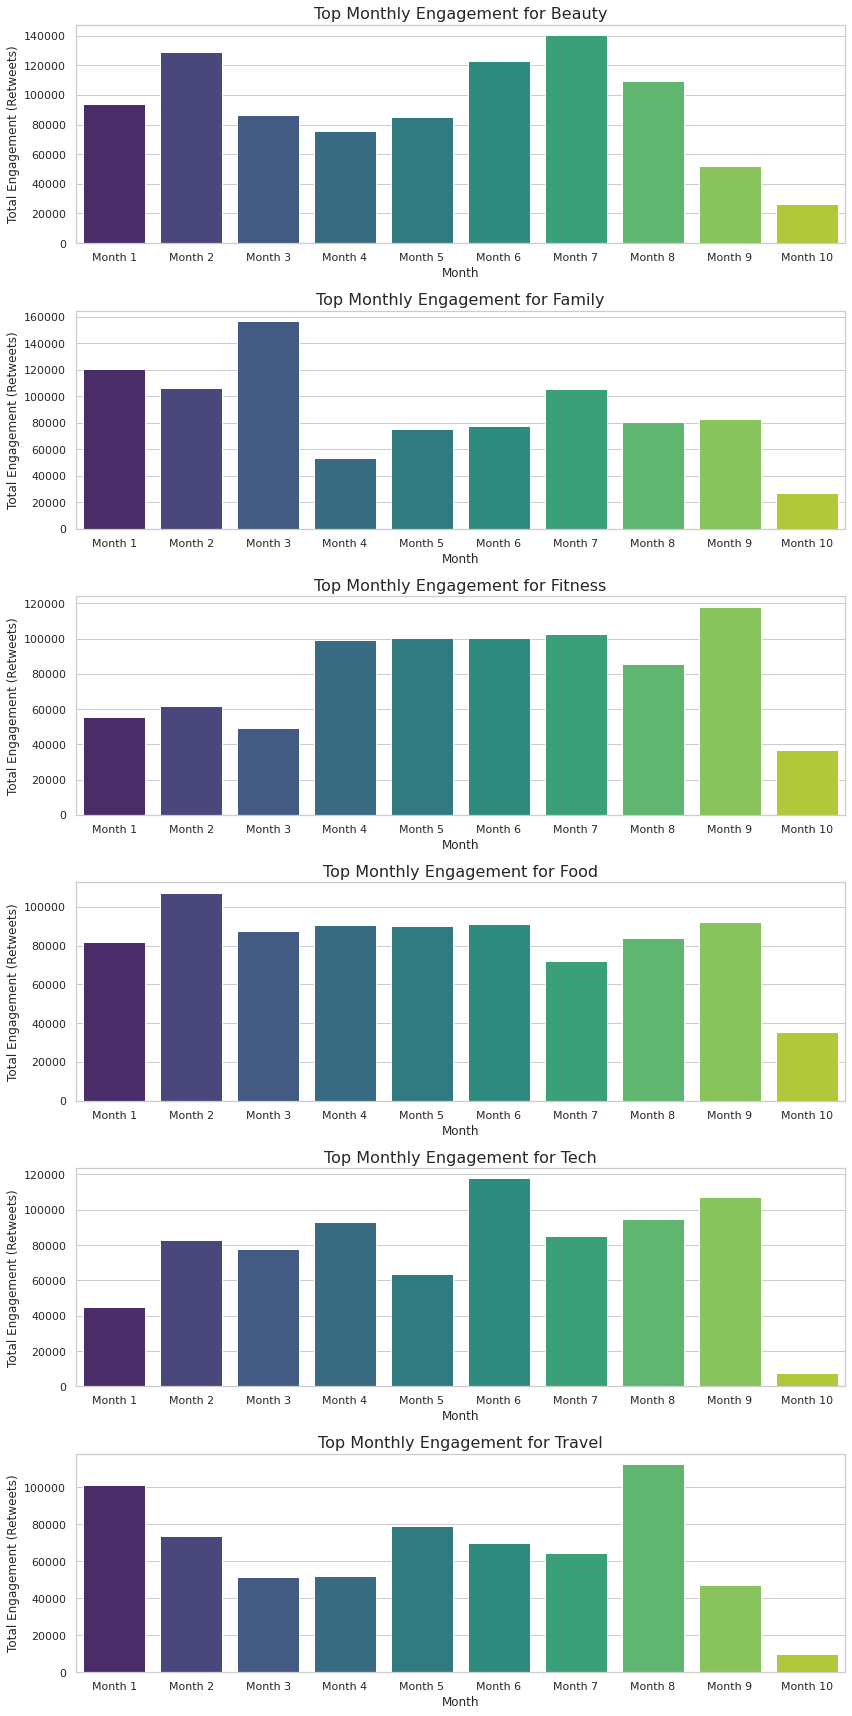

In [274]:
categories = df_month_engage_retweets['category'].unique()

num_categories = len(categories)
plt.figure(figsize=(12, 4 * num_categories))

for i, category in enumerate(categories):
    # Filter data for the current category
    category_data = df_month_engage_retweets[df_month_engage_retweets['category'] == category]

    # Create a subplot for each category
    plt.subplot(num_categories, 1, i + 1)  # (rows, cols, index)

    # Create the bar plot
    sns.barplot(data=category_data, x='month', y='top_engage_retweets', palette='viridis')

    # Add title and labels
    plt.title(f'Top Monthly Engagement for {category}', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Engagement (Retweets)', fontsize=12)
    plt.xticks(ticks=range(0, 10), labels=[f'Month {i}' for i in range(1, 13)])  # Setting x-ticks for clarity

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


### Top 1 likes tweets engagement

In [275]:
# Extract month and year from the date
df['date'] = df['date'].astype('datetime64[ns]')
df['month'] = df['date'].dt.month

# Group by 'category' and 'month_year', then sum the retweets
monthly_engagement_likes = df.groupby(['category', 'month']).agg(
    top_engage_likes=('likes', 'sum')
)

top_monthly_engagement_likes = monthly_engagement_likes.loc[monthly_engagement_likes.groupby('category')['top_engage_likes'].idxmax()]
top_monthly_engagement_likes.reset_index()


,category,month,top_engage_likes
0,Beauty,6,64932
1,Family,1,64186
2,Fitness,6,63504
3,Food,7,54709
4,Tech,6,57919
5,Travel,8,56875


In [278]:
df_monthly_engagement_likes = monthly_engagement_likes.reset_index()
df_monthly_engagement_likes

,category,month,top_engage_likes
0,Beauty,1,45167
1,Beauty,2,63314
2,Beauty,3,41033
3,Beauty,4,38123
4,Beauty,5,53896
5,Beauty,6,64932
6,Beauty,7,59724
7,Beauty,8,61147
8,Beauty,9,32462
9,Beauty,10,4853


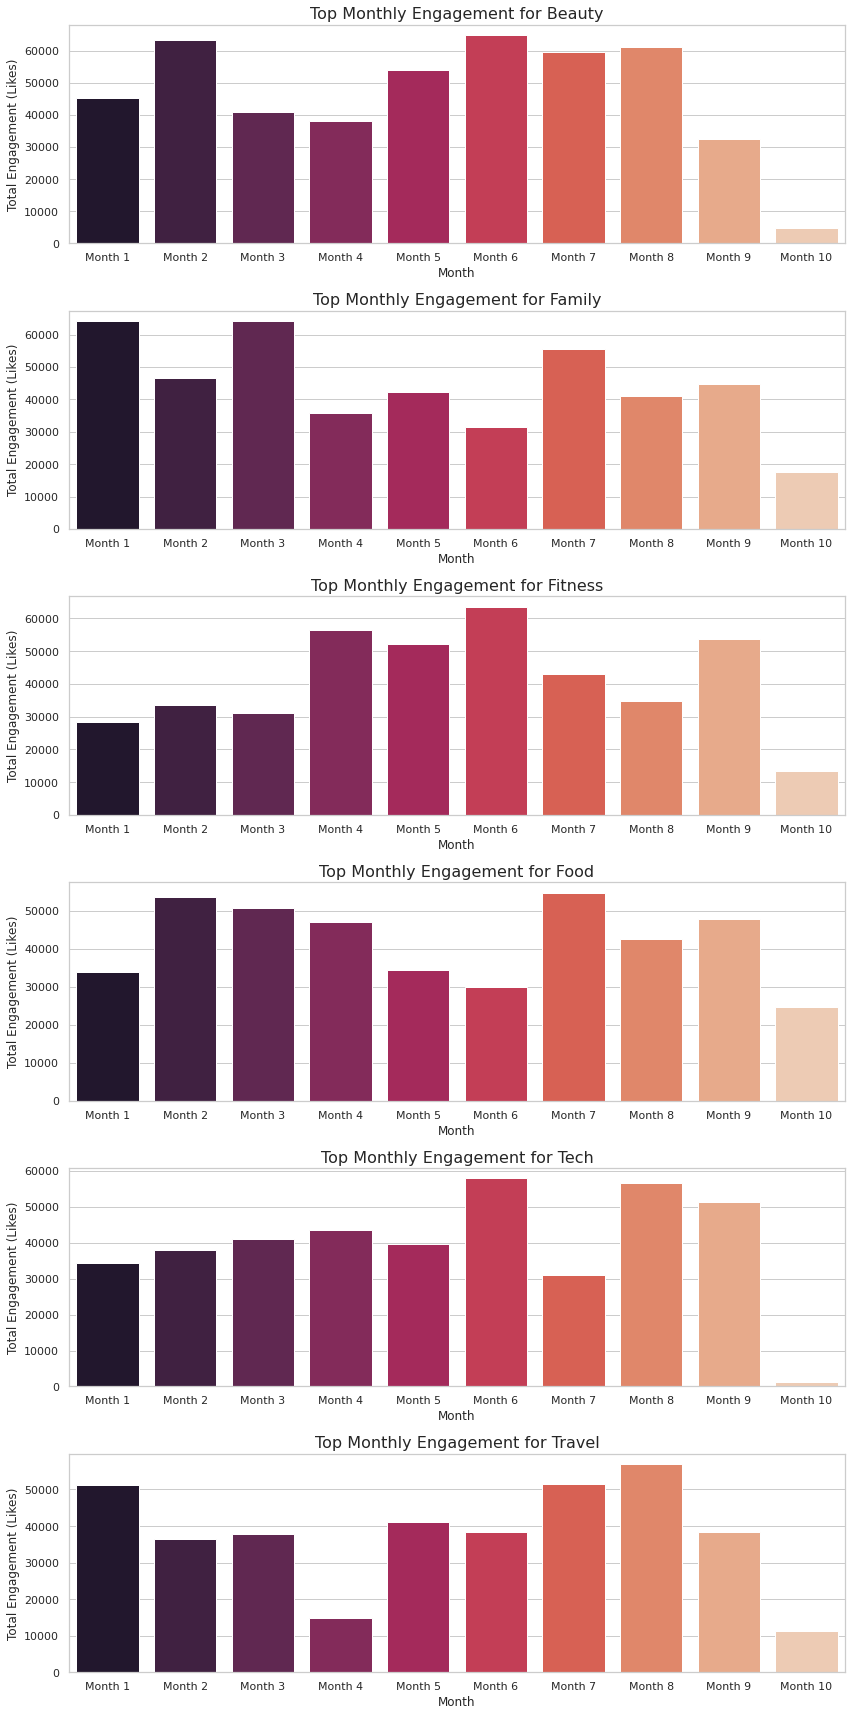

In [280]:
categories = df_monthly_engagement_likes['category'].unique()

num_categories = len(categories)
plt.figure(figsize=(12, 4 * num_categories))

for i, category in enumerate(categories):
    # Filter data for the current category
    category_data = df_monthly_engagement_likes[df_monthly_engagement_likes['category'] == category]

    # Create a subplot for each category
    plt.subplot(num_categories, 1, i + 1)  # (rows, cols, index)

    # Create the bar plot
    sns.barplot(data=category_data, x='month', y='top_engage_likes', palette='rocket')

    # Add title and labels
    plt.title(f'Top Monthly Engagement for {category}', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Engagement (Likes)', fontsize=12)
    plt.xticks(ticks=range(0, 10), labels=[f'Month {i}' for i in range(1, 13)])  # Setting x-ticks for clarity

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In [201]:
monthly_engagement_sorted = monthly_engagement.sort_values(by=['category', 'top_engage_retweets'], ascending=[True, False])

# Select the top 3 months for each category
top_3_monthly_engagement = monthly_engagement_sorted.groupby('category').head(3)

# Display the result
top_3_monthly_engagement

top_engage_retweets
category month                     
Beauty   7                   140303
         2                   129203
         6                   123045
Family   3                   156658
         1                   120571
         2                   106042
Fitness  9                   118055
         7                   102367
         6                   100456
Food     2                   107290
         9                    92393
         6                    91287
Tech     6                   117708
         9                   106985
         8                    94859
Travel   8                   112446
         1                   101017
         5                    79349

## Step 4: Conclusions 
## Key insight
Describe Conclusions 

**Social Media Data Analysis: Key Insights**

Analyzing social media data is crucial for understanding user behavior and trends. Important factors influencing the popularity of categories include brand image, product launches, and consumer interaction. Timing is essential for effective content posting, while personalized content improves user engagement. 

**Recommendations:**
- Segment audiences by interests and behaviors for tailored content.
- Analyze relationships between factors affecting popularity.
- Utilize both quantitative and qualitative analysis tools, like sentiment analysis.
- Continuously monitor trends to adapt strategies.

**Applications:**
- Develop content recommendation features based on user interaction.
- Enhance feed algorithms for more relevant posts.
- Create targeted marketing campaigns using user insights.